# Importación de librerías

In [ ]:
# Importar librerías necesarias
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split #Para separar los datos de entrenamiento y los de val.
#%matplotlib inline En otros editores como Jupyter lab para que las gráficas salgan entre las celdas

In [ ]:
print(cv2.__version__)

4.1.2


# Se baja el dataset desde el Drive

In [ ]:
#Si fuera Local:
#iris_dataset = pd.read_csv('Iris.csv')

#Para google colab:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_dataset = pd.read_csv('/content/drive/My Drive/ESPECIALIZACIÓN/Machine Learning/1S/MACHINE LEARNING/1ra semana/Iris.csv')
#Ya queda como dataframe

# Se preparan los datos del dataset antes de procesarlos

In [ ]:
iris_dataset.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#Se separan los datos en matriz de características para relaizar el entreno
print("Target names:", iris_dataset['Species'],"\n")
print("Target names:", np.unique(iris_dataset['Species']),"\n")
print("Feature names:\n", iris_dataset.keys()[1:5])

Target names: 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object 

Target names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 

Feature names:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [ ]:
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]#Features
print(X,"\n") #Con X.loc[0:4,:] se puede mostrar por filas, de la 0 a 4 (0:4) y todas las columnas (:)
Y= iris_dataset['Species'][:]#Target values  >El [:] es para extraer todos los valores del arreglo (de pandas a numpy)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iri

In [ ]:
#Se ve el tamaño del dataset
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
Y=Y.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
#y=pd.factorize(Y)  #otra forma usando pandas de pasar de un arreglo str a numérico
# lo anterior genera un arreglo con dos arreglos, en uno está el que se necesita y en otro la info de que numero corresponde a cual str
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2a8504479d2b670814992d1ac8988a400414bea00afa1c52c6bcc50f661faed9
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff079b8ce48>,
      dtype=object)

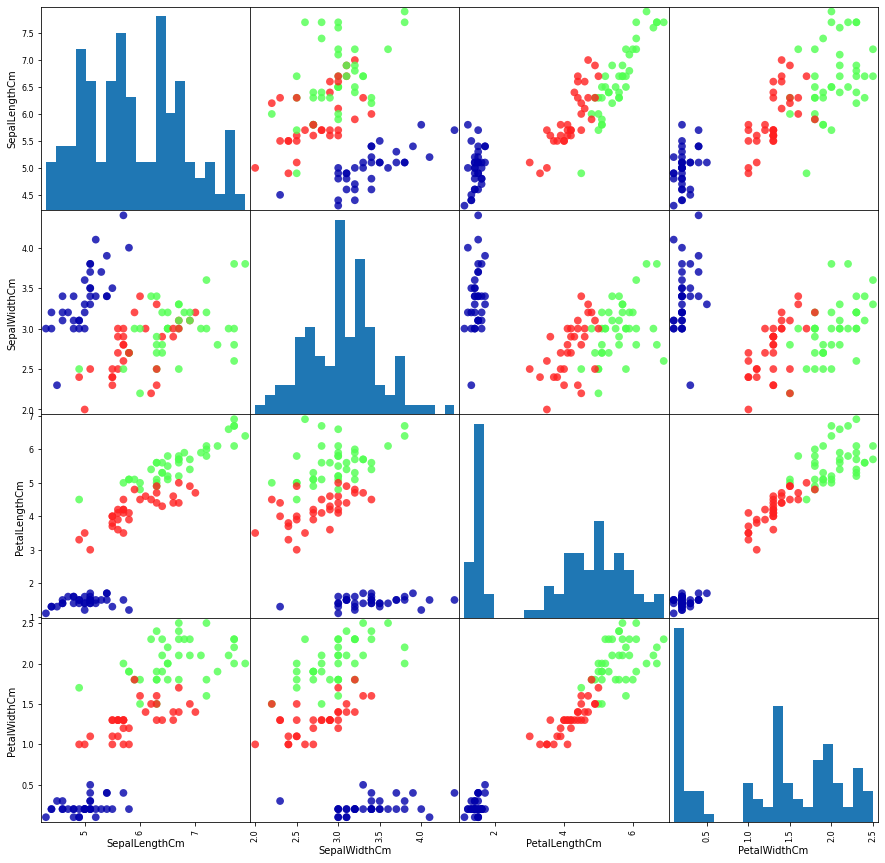

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.keys()[1:5])
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

# Se usa el K Nearest Neightbor Algorithm

In [ ]:
#Se usa el train_test_split para separar los datos de entreno y los de validación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=4) #n_neightbors es el hyperparameter 
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
model_knn.score(X_test,y_test)

0.9777777777777777

# Prueba del predictor


In [ ]:
lsepa=float(input('Insertar longitud del sépalo: '))
wsepa=float(input('Insertar ancho del sépalo: '))
lpeta=float(input('Insertar longitud del pétalo: '))
wpeta=float(input('Insertar ancho del pétalo: '))
especie=model_knn.predict([[lsepa,wsepa,lpeta,wpeta]]) #prueba con 1.2 3.4 5.6 1.1 >> versicolor
especies=np.unique(iris_dataset['Species'])
print("\n","La especie es ",especies[especie[0]])


Insertar longitud del sépalo: 1.2
Insertar ancho del sépalo: 3.4
Insertar longitud del pétalo: 5.2
Insertar ancho del pétalo: 1.1

 La especie es  Iris-versicolor
